### Feedforward Neural Networks
Consider two models: 
(a) a 2-layer feedforward neural network (i.e., 1 hidden layer with $f(x,W_1,b_1,W_2,b_2) = W_2\max(0,W_1x+b_1) + b_2$), and 
(b) same as before but with leaky ReLU ($f(x) = x$ if $x > 0$, else $ f(x) = 0.01*x$).

#### a.) Build the above classifiers using Keras and Tensorflow and solve the classification problem for MNIST/Fashion MNIST.
#### b.) Discuss how optimizer choice influences performance.
#### c.) What happens when the number of hidden units chosen is much smaller. Similarly, what happens when the number of hidden units chosen is much higher?

2.8.0


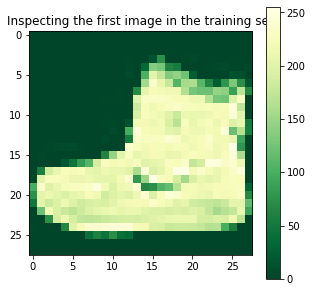

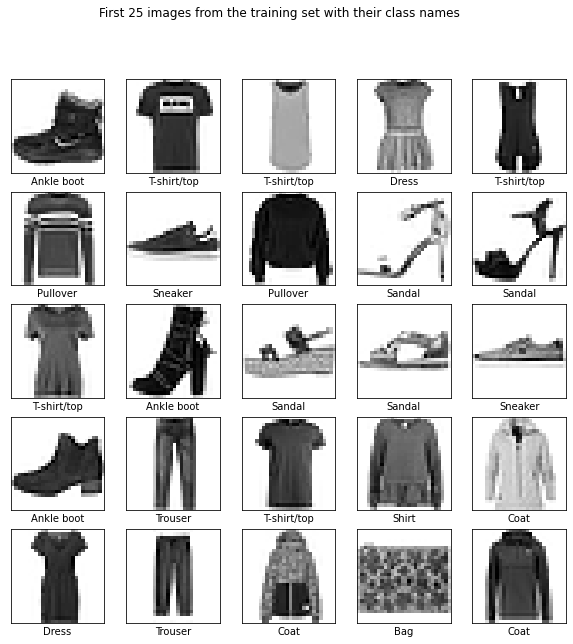

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5007 - accuracy: 0.8236
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3761 - accuracy: 0.8642
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3371 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3130 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2967 - accuracy: 0.8900
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2821 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2688 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2581 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2484 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

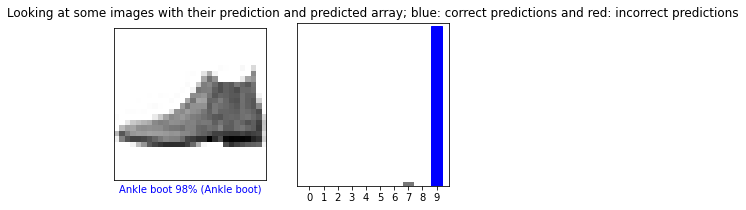

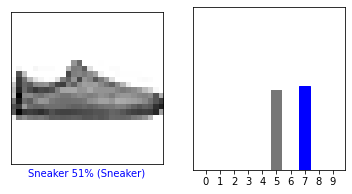

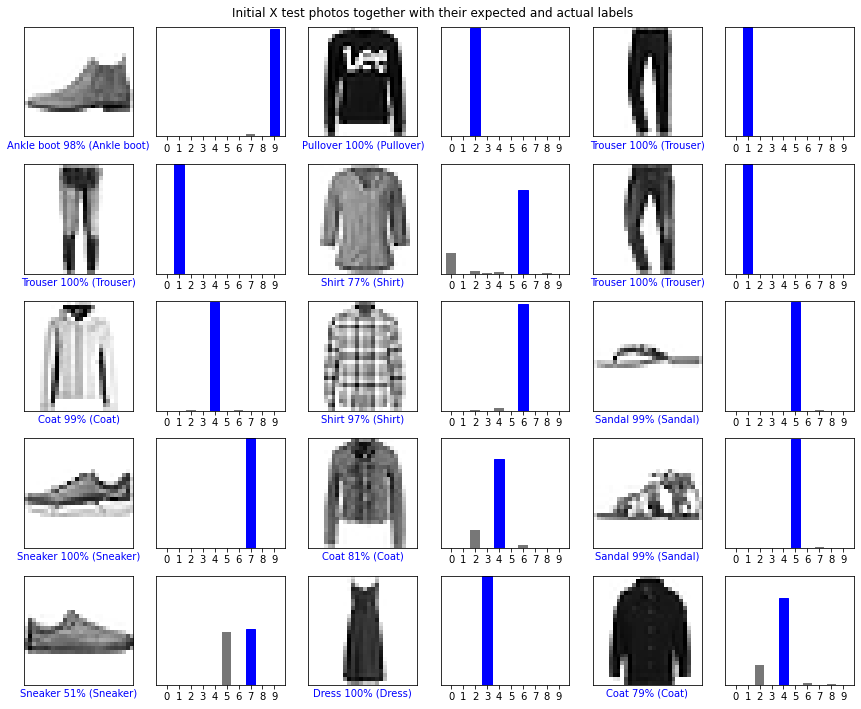

(28, 28)
(1, 28, 28)
[[3.6874419e-06 2.8294294e-11 9.9708754e-01 3.1414058e-07 1.6821086e-03
  1.2660575e-12 1.2261771e-03 2.1650696e-12 1.2597184e-07 4.9767616e-12]]


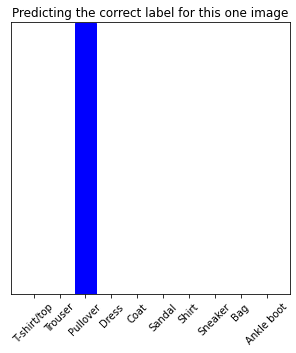

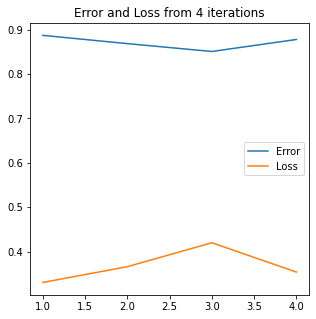

In [178]:
#Importing libraries such as numpy, TensorFlow and tf.keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

#TensorFlow should be used to dynamically import and load the Fashion MNIST data.
#Here, Images display certain garments in a low-resolution manner (28 by 28 pixels)

fashion_mnist_dataset = tf.keras.datasets.fashion_mnist
(tr_images, tr_labels), (tes_images, tes_labels) = fashion_mnist_dataset.load_data()
 
#Storing the class names here to use later when plotting the images
class_images = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Examining the labels and shapes of the data
tr_images.shape
len(tr_labels)
tr_labels
tes_images.shape
len(tes_labels)

#Data Preprocessing
plt.figure()
plt.imshow(tr_images[0])
plt.colorbar()
plt.grid(False)
plt.title("Inspecting the first image in the training set")
plt.show()

#From the image above, we deduced that the pixel values range from 0 to 255.
#Before supplying them to the neural network model, 
#Scaling these values to a range between 0 and 1.
tr_images = tr_images / 255.0
tes_images = tes_images / 255.0

#Let's show the first 25 images from the training set, 
#with the class name appearing beneath each picture.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(tr_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_images[tr_labels[i]])
    plt.suptitle("First 25 images from the training set with their class names")
plt.show()

#Building the Relu Model, configuring the layers, compiling the model and setting up the layers
def relu_model(hidden_layer):
    model_relu = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(hidden_layer, activation='relu'),
        tf.keras.layers.Dense(10)])
    
#Compiling using loss function, Optimizer and Metrics
    model_relu.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return model_relu

#Building the Leaky Relu Model, configuring the layers, compiling the model and setting up the layers
def relu_leaky_model(hidden_layer):
    model_relu = tf.keras.models.Sequential([ 
        tf.keras.layers.Flatten(input_shape=(28,28)), 
        tf.keras.layers.Dense(128,activation=tf.keras.layers.LeakyReLU(alpha=0.3)),
        tf.keras.layers.Dense(10)
  ]) 

#Compiling using loss function, Optimizer and Metrics
    model_relu.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return model_relu

#Feeding the model and Evalutating the Accuracy
def model_fitting(model_fit):
    model_fit.fit(tr_images, tr_labels, epochs=10)
    test_loss, test_accuracy = model_fit.evaluate(tes_images,  tes_labels, verbose=2)
    print('\nTest accuracy:', test_accuracy)
    return test_accuracy, test_loss

#Intializing the final array
err = np.zeros(4)
loss = np.zeros(4)

#ReLU with 128 hidden values
model = relu_model(128)
err[0],loss[0] = model_fitting(model)

#Leaky ReLU with 128 hidden values
model = relu_leaky_model(128)
err[1], loss[1] = model_fitting(model)

#ReLU with 10 hidden values
model = relu_model(10)
err[2], loss[2] = model_fitting(model)

#Leaky ReLU with 10 hidden values
model = relu_leaky_model(10)
err[3], loss[3] = model_fitting(model)

print('\nTest accuracy:', err)
print('\nLoss :', loss)

#Predicting and Adding a softmax layer to transform the model's logit-based linear outputs into probabilities.
prob_mod = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
pred = prob_mod.predict(tes_images)

#Taking a look at the first prediction
pred[0] 
#Label with the highest confidence value
np.argmax(pred[0])
tes_labels[0]

#Creating a graph, to view all 10 class predictions 
def image_plotting(i, pred_arr, true_lab, image):
    true_lab, image = true_lab[i], image[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(image, cmap=plt.cm.binary)

    pred_label = np.argmax(pred_arr)
    if pred_label == true_lab:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_images[pred_label],
                                100*np.max(pred_arr),
                                class_images[true_lab]),
                                color=color)

def plotting_arr(i, pred_arr, true_lab):
    true_lab = true_lab[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), pred_arr, color="#777777")
    plt.ylim([0, 1])
    pred_label = np.argmax(pred_arr)

    thisplot[pred_label].set_color('red')
    thisplot[true_lab].set_color('blue')
    
#Verifying predictions and inspecting the 0th picture, the predictions, and the prediction array. 
#Labels for correct predictions are blue, whereas those for incorrect predictions are red.

def results_plotting():
    i = 0
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    image_plotting(i, pred[i], tes_labels, tes_images)
    plt.subplot(1,2,2)
    plotting_arr(i, pred[i],  tes_labels)
    plt.title("Looking at some images with their prediction and predicted array; blue: correct predictions and red: incorrect predictions")
    plt.show()

    i = 12
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    image_plotting(i, pred[i], tes_labels, tes_images)
    plt.subplot(1,2,2)
    plotting_arr(i, pred[i],  tes_labels)
    plt.show()
    
#Plot the initial X test photos together with the expected and actual labels. 
#Blue for accurate predictions and red for inaccurate ones

    no_rows = 5
    no_cols = 3
    no_images = no_rows*no_cols
    plt.figure(figsize=(2*2*no_cols, 2*no_rows))
    for i in range(no_images):
        plt.subplot(no_rows, 2*no_cols, 2*i+1)
        image_plotting(i, pred[i], tes_labels, tes_images)
        plt.subplot(no_rows, 2*no_cols, 2*i+2)
        plotting_arr(i, pred[i], tes_labels)
        plt.suptitle("Initial X test photos together with their expected and actual labels")
    plt.tight_layout()
    plt.show()

  # Making a prediction about a single image using the trained model to finish and
  # Getting an image from the test dataset.
    image = tes_images[1]
    print(image.shape)

  # Adding the picture to a batch when it is the sole object
    image = (np.expand_dims(image,0))
    print(image.shape)

  # Speculating the accurate label for the image
    spec_single = prob_mod.predict(image)
    print(spec_single)

    plotting_arr(1, spec_single[0], tes_labels)
    _ = plt.xticks(range(10), class_images, rotation=45)
    plt.title("Predicting the correct label for this one image")
    np.argmax(spec_single[0])

results_plotting()

#Plotting 
fig = plt.figure()
plt.plot(np.linspace(1, 4, 4), err, label="Error")
plt.title('Error and Loss from 4 iterations')
plt.plot(np.linspace(1, 4, 4), loss, label="Loss")
plt.legend()
plt.show()

In conclusion, the error rate (Loss) and model accuracy values depend on the quantity of hidden variables and nodes as well as whether or not the model was leaky. Note that, a model can be inaccurate even when it is very confident. Here, the correct predictions are shown in blue color and incorrect predictions are shown in red color. For each of the models we developed, below is a summary of each of the values:

##### ReLU with 128 hidden values: Accuracy: 88.99%, Loss: 0.31707856

##### Leaky ReLU with 128 hidden values: Accuracy: 86.37%, Loss: 0.38370058

##### ReLU with 10 hidden values: Accuracy: 83.66%, Loss: 0.4623746

##### Leaky ReLU with 10 hidden values: Accuracy: 86.93%, Loss: 0.36853015

According to the summary above, the ReLU model with 128 hidden values would be the optimal model in terms of maximum accuracy and least loss. The Leaky ReLU model with 10 distinct values would be the second-best model. ReLU with 10 hidden values, which had the biggest loss and lowest accuracy compared to other models, was the model that underperformed in this instance. In this case, a ReLU model outperforms a Leaky ReLU model with more hidden values, but the converse is true for the Leaky ReLU model.